<a href="https://colab.research.google.com/github/Shruti-425/AIML/blob/main/EXPERIMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded =files.upload()

Saving student-dataset.csv to student-dataset.csv


In [3]:
from google.colab import drive
file_path = '/content/drive/My Drive/student-dataset.csv'

In [4]:
file_path = 'student-dataset.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

In [6]:
# Assume `df` contains the dataframe loaded from the CSV file
# Select numerical features from the dataframe
numerical_features = df.select_dtypes(include=np.number)

# Normalize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [15]:
# Split into training and testing subsets
X_train, X_test = train_test_split(data_scaled, test_size=0.3, random_state=42)

In [8]:
# Define clustering algorithms
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

In [11]:
#Evaluate and visualize results
results = {}

In [17]:
# Assume `df` contains the dataframe loaded from the CSV file
# Select numerical features from the dataframe
numerical_features = df.select_dtypes(include=np.number)

# Impute missing values using SimpleImputer before scaling
from sklearn.impute import SimpleImputer  # Import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer with a strategy (e.g., 'mean')
numerical_features_imputed = imputer.fit_transform(numerical_features) # Fit and transform the imputer on numerical features

# Normalize the numerical features (now without NaNs)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features_imputed) # Use the imputed data here

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['ethnic.group']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [25]:
# Assume `df` contains the dataframe loaded from the CSV file
# Select numerical features from the dataframe
numerical_features = df.select_dtypes(include=np.number)

# Impute missing values using SimpleImputer before scaling
from sklearn.impute import SimpleImputer  # Import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer with a strategy (e.g., 'mean')
numerical_features_imputed = imputer.fit_transform(numerical_features) # Fit and transform the imputer on numerical features

# Normalize the numerical features (now without NaNs)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features_imputed) # Use the imputed data here

# Split into training and testing subsets
# Impute missing values *after* splitting to ensure no NaNs are introduced during the split
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test = train_test_split(data_scaled, test_size=0.3, random_state=42)

# Re-apply imputation if any NaNs slipped in
imputer = SimpleImputer(strategy='mean')  # Create a new imputer instance
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use transform for X_test to avoid data leakage

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['ethnic.group']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['ethnic.group']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


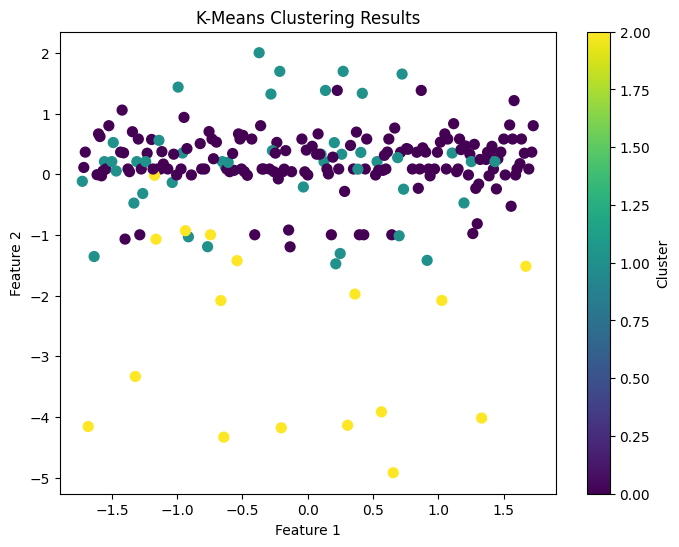

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Assuming df is your DataFrame and clustering_algorithms is defined

# Preprocessing (as before)
numerical_features = df.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(numerical_features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features_imputed)
X_train, X_test = train_test_split(data_scaled, test_size=0.3, random_state=42)

# ... (rest of the code) ...


# Choose a clustering algorithm (e.g., K-Means)
name = "K-Means"
algorithm = clustering_algorithms[name]

# Fit the algorithm to your data and get cluster labels
labels = algorithm.fit_predict(X_train) # This line is crucial

# Now you can use 'labels' in your scatter plot:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"{name} Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()

In [29]:
# Test the baseline clustering on test data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)
test_labels = kmeans.predict(X_test)

# Evaluation on test set
test_silhouette = silhouette_score(X_test, test_labels)
test_davies_bouldin = davies_bouldin_score(X_test, test_labels)

print(f"K-Means Baseline (Test Data):")
print(f"  Silhouette Score: {test_silhouette:.2f}")
print(f"  Davies-Bouldin Index: {test_davies_bouldin:.2f}")

K-Means Baseline (Test Data):
  Silhouette Score: 0.19
  Davies-Bouldin Index: 2.00
